1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import category_encoders as ce


In [4]:
# Here you get utf-8 error so you should encode using encoding parameter in the read_csv method.

In [5]:
df=pd.read_csv("customer_booking.csv",encoding='latin-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [6]:
df.shape

(50000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
X=df.drop(["booking_complete"],axis=1)
y=df["booking_complete"]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [11]:
X_train.shape

(35000, 13)

In [12]:
y_train.shape

(35000,)

# Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. 
First, I will check the data types of variables again.

In [13]:
X_train.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

Encode categorical variables

Now, I will encode the categorical variables.

In [14]:
X_train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
38094,1,Internet,RoundTrip,13,5,5,Fri,HKGPER,Australia,0,0,0,5.62
40624,2,Internet,RoundTrip,201,5,2,Sat,LOPTPE,Taiwan,1,0,0,4.67
49425,7,Internet,RoundTrip,41,6,6,Sun,PEKPEN,Malaysia,1,1,1,6.42
35734,1,Internet,RoundTrip,227,5,16,Sun,CGKICN,Indonesia,1,1,0,6.62
41708,1,Internet,RoundTrip,4,5,13,Wed,PERPNH,Australia,1,1,0,5.62


In [15]:
encoder=ce.OrdinalEncoder(cols=['sales_channel','flight_day','route','flight_duration','trip_type','booking_origin'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [16]:
X_train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
38094,1,1,1,13,5,5,1,1,1,0,0,0,1
40624,2,1,1,201,5,2,2,2,2,1,0,0,2
49425,7,1,1,41,6,6,3,3,3,1,1,1,3
35734,1,1,1,227,5,16,3,4,4,1,1,0,4
41708,1,1,1,4,5,13,4,5,1,1,1,0,1


In [17]:
X_test.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
33553,2,1,1,47,4,15,5,173.0,5.0,1,1,0,11
9427,1,2,1,46,85,14,6,45.0,13.0,1,1,0,8
199,1,1,1,132,20,9,6,12.0,-1.0,1,0,0,8
12447,1,1,1,58,18,23,6,365.0,5.0,1,1,1,5
39489,2,1,1,50,5,5,5,110.0,7.0,1,0,0,4


# We now have training and test set ready for model building.


In [18]:
rfc=RandomForestClassifier(n_estimators=1000,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [19]:
rfc.score(X_train,y_train)

0.9999142857142858

In [25]:
rfc.score(X_test,y_test)

0.8554

In [20]:
# Predict the test set results.

y_pred=rfc.predict(X_test)

In [21]:
# Check Accuracy score
# Evaluate the model
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8554


In [22]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

purchase_lead            0.189079
route                    0.148823
flight_hour              0.139385
length_of_stay           0.125668
booking_origin           0.118145
flight_day               0.089709
flight_duration          0.074791
num_passengers           0.048924
wants_in_flight_meals    0.020714
wants_preferred_seat     0.016278
wants_extra_baggage      0.015477
sales_channel            0.011082
trip_type                0.001924
dtype: float64

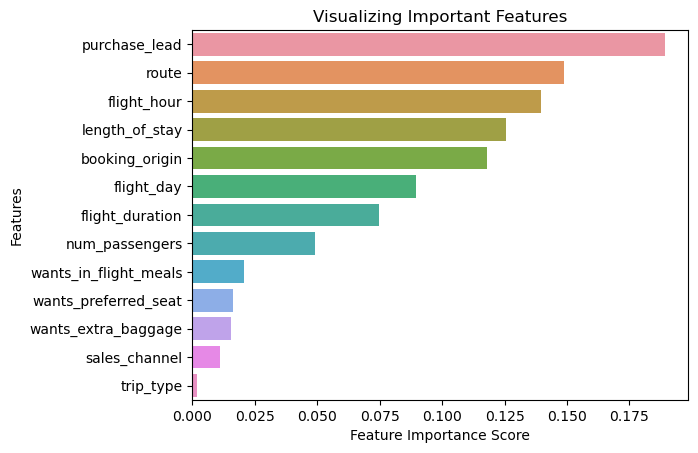

In [24]:

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Results and conclusion



In this project, I build a Random Forest Classifier to predict the booking. I build model with sample of 1000 decision-trees.
The model accuracy score with 1000 decision trees is 0.8554.Sos expected accuracy increases with number of decision-trees in the model.